# Chapter 1 – The Machine Learning landscape

# Setup

首先我们要确保所由代码兼容python2和python3，然后导入一些常用模块，并确保 MatplotLib可以在notebook中画图，最后写一个可以保存图片的函数

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# What Is Machine Learning?

Machine Learning is the science (and art) of programming computers so they can learn from data.

Here is a slightly more general definition:
> [Machine Learning is the] field of study that gives computers the ability to learn without being explicitly programmed.

> 机器学习是一种不需要明确的程序就使得计算机具有学习能力的领域

>                                                                                —Arthur Samuel, 1959

And a more engineering-oriented one:
更工程化的定义：

>A computer program is said to learn from experience E with respect to some task T and some performance measure P, 

>if its performance on T, as measured by P, improves with experience E.

>对于某类任务T 和性能度量 P，一个计算机程序被认为可以从经验E 中学习是指，通过经验E 改进后，

>它在任务T 上由性能度量P 衡量的性能有所提升。

>                                                                                 —Tom Mitchell, 1997



To summarize, Machine Learning is great for:
* Problems for which existing solutions require a lot of hand-tuning or long lists of rules: one Machine Learning algorithm can often simplify code and perform better.

* Complex problems for which there is no good solution at all using a traditional approach: the best Machine Learning techniques can find a solution.

* Fluctuating environments: a Machine Learning system can adapt to new data.

* Getting insights about complex problems and large amounts of data.

# Types of Machine Learning Systems

* Whether or not they are trained with human supervision (supervised, unsupervised, semisupervised, and Reinforcement Learning)
* Whether or not they can learn incrementally on the fly (online versus batch learning) 他们是否可以逐步学习（在线学习和批量学习）
* Whether they work by simply comparing new data points to known data points, or instead detect patterns in the training data and build a predictive model, much like scientists do (instance-based versus model-based learning)他们是否只是通过简单地比较新的数据点到已知数据点上，或者像科学家所做的那样，在训练集中寻找模式，构建一个预测模型（基于实例的学习或者基于模型的学习）

In Machine Learning an __attribute__ is a data type (e.g., “Mileage”), while a __feature__ has several meanings depending on the context, but
generally means an attribute plus its value (e.g., “Mileage = 15,000”). Many people use the words attribute and feature interchangeably, though.

## Supervised/Unsupervised Learning

### Reinforcement learning

__Reinforcement Learning__ is a very different beast. The learning system, called an __agent__ in this context, can observe the environment, select and perform actions, and get __rewards__ in return (or penalties in the form of negative rewards, as figure below). It must then learn by itself what is the best strategy, called a __policy__, to get the most reward over time. A policy defines what action the agent should choose when it is in a given situation.

![Figure 1-12. Reinforcement Learning](https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0112.png)

## Batch and Online Learning

Another criterion used to classify Machine Learning systems is whether or not the system can learn incrementally from a stream of incoming data.

另外一个对机器学习系统分类的标准是系统是否可以从传入的数据中学习增量

### Batch learning

In batch learning, the system is incapable of learning incrementally: it must be trained using all the available data. This will generally take a lot of time and computing resources, so it is typically done offline. First the system is trained, and then it is launched into production and runs without learning anymore(然后投入生产，不用再学习了); it just applies what it has learned. This is called offline learning.

If you want a batch learning system to know about new data (such as a new type of spam), you need to train a new version of the system from scratch on the full dataset (not just the new data, but also the old data), then stop the old system and replace it with the new one.

### Online learning

In online learning, you train the system incrementally(递增的) by feeding it data instances sequentially(顺序的), either individually or by small groups called mini-batches. Each learning step is fast and cheap, so the system can learn about new data on the fly, as it arrives.

Online learning algorithms can also be used to train systems on huge datasets that cannot fit in one machine’s main memory (this is called out-of-core learning).(在线学习算法也可以用来训练大型数据集上，由于这些数据集太大不能放在一台机器的主内存中（这被称为核外学习）。) The algorithm loads part of the data, runs a training step on that data, and repeats the process until it has run on all of the data.

This whole process is usually done offline (i.e., not on the live system), so online learning can be a confusing name. Think of it as incremental learning.

![Figure 1-14. Using online learning to handle huge datasets](https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0114.png)

One important parameter of online learning systems is how fast they should adapt to changing data: this is called the __learning rate__. If you set a high learning rate, then your system will rapidly adapt to new data, but it will also tend to quickly forget the old data (you don’t want a spam filter to flag only the latest kinds of spam it was shown). Conversely, if you set a low learning rate, the system will have more inertia(惯性，惰性); that is, it will learn more slowly, but it will also be less sensitive to noise in the new data or to sequences of nonrepresentative data points.

## Instance-Based Versus Model-Based Learning

One more way to categorize Machine Learning systems is by how they __generalize__. Most Machine Learning tasks are about making predictions. This means that given a number of training examples, the system needs to be able to generalize to examples it has never seen before. Having a good performance measure on the training data is good, but insufficient; the true goal is to perform well on new instances.

There are two main approaches to generalization: instance-based learning and model-based learning.

### Instance-based learning

Instead of just flagging emails that are identical to known spam emails, your spam filter could be programmed to also flag emails that are very similar to known spam emails. This requires a __measure of similarity__(相似性度量) between two emails. A (very basic) similarity measure between two emails could be to count the number of words they have in common. The system would flag an email as spam if it has many words in common with a known spam email.

This is called instance-based learning: the system learns the examples by heart, then generalizes to new cases using a similarity measure.

![Figure 1-15. Instance-based learning](https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0115.png)

### Model-based learning

Another way to generalize from a set of examples is to build a model of these examples, then use that model to make predictions. This is called model-based learning.

![Figure 1-16. Model-based learning](https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0116.png)

### Load and prepare Life satisfaction data

In [6]:
import pandas as pd

# Download CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI
datapath = "datasets/lifesat/"

oecd_bli = pd.read_csv(datapath+"oecd_bli_2015.csv", thousands=',')
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
LOCATION                 3292 non-null object
Country                  3292 non-null object
INDICATOR                3292 non-null object
Indicator                3292 non-null object
MEASURE                  3292 non-null object
Measure                  3292 non-null object
INEQUALITY               3292 non-null object
Inequality               3292 non-null object
Unit Code                3292 non-null object
Unit                     3292 non-null object
PowerCode Code           3292 non-null int64
PowerCode                3292 non-null object
Reference Period Code    0 non-null float64
Reference Period         0 non-null float64
Value                    3292 non-null float64
Flag Codes               1120 non-null object
Flags                    1120 non-null object
dtypes: float64(3), int64(1), object(13)
memory usage: 437.3+ KB


In [10]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 3217
Data columns (total 17 columns):
LOCATION                 888 non-null object
Country                  888 non-null object
INDICATOR                888 non-null object
Indicator                888 non-null object
MEASURE                  888 non-null object
Measure                  888 non-null object
INEQUALITY               888 non-null object
Inequality               888 non-null object
Unit Code                888 non-null object
Unit                     888 non-null object
PowerCode Code           888 non-null int64
PowerCode                888 non-null object
Reference Period Code    0 non-null float64
Reference Period         0 non-null float64
Value                    888 non-null float64
Flag Codes               58 non-null object
Flags                    58 non-null object
dtypes: float64(3), int64(1), object(13)
memory usage: 124.9+ KB


In [11]:
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [14]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

### Load and prepare GDP per capita data

In [22]:
# Download data from http://goo.gl/j1MSKe (=> imf.org)
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)   #inplace参数的意思就是代替原来的变量，深拷贝
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [23]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
#http://blog.csdn.net/zutsoft/article/details/51498026
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [24]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]
# http://blog.csdn.net/xw_classmate/article/details/51333646

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [25]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

Saving figure money_happy_scatterplot


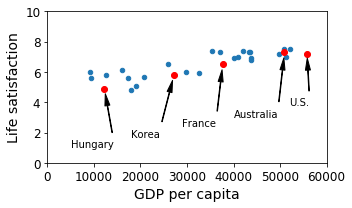

In [30]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
save_fig('money_happy_scatterplot')
plt.show()

In [31]:
sample_data.to_csv("life_satisfaction_vs_gdp_per_capita.csv")

In [32]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Australia,50961.865,7.3
Hungary,12239.894,4.9
Korea,27195.197,5.8
United States,55805.204,7.2
France,37675.006,6.5


Saving figure tweaking_model_params_plot


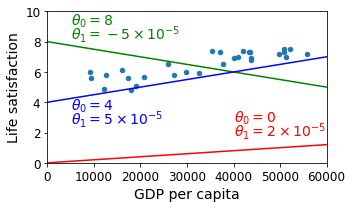

In [33]:
import numpy as np

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
save_fig('tweaking_model_params_plot')
plt.show()

In [34]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]  #http://blog.csdn.net/crossky_jing/article/details/49466127
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.8530528002664362, 4.9115445891584831e-05)

Saving figure best_fit_model_plot


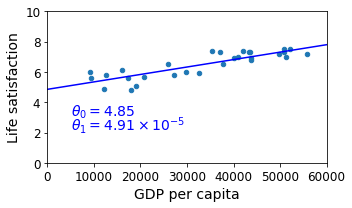

In [35]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
save_fig('best_fit_model_plot')
plt.show()

In [37]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict(cyprus_gdp_per_capita)[0][0]
cyprus_predicted_life_satisfaction

22587.49


5.9624474431881502

Saving figure cyprus_prediction_plot


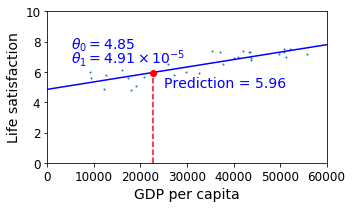

In [38]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
save_fig('cyprus_prediction_plot')
plt.show()

In [39]:
sample_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [40]:
sample_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


If all went well, your model will make good predictions. If not, you may need to use more attributes (employment rate, health, air pollution, etc.), get more or better quality training data, or perhaps select a more powerful model (e.g., a Polynomial Regression model).

In summary:
* You studied the data.
* You selected a model.
* You trained it on the training data (i.e., the learning algorithm searched for the model parameter values that minimize a cost function).
* Finally, you applied the model to make predictions on new cases (this is called inference), hoping that this model will generalize well.

### Irrelevant Features

As the saying goes: garbage in, garbage out. Your system will only be capable of learning if the training data contains enough relevant features and not too many irrelevant ones. A critical part of the success of a Machine Learning project is coming up with a good set of features to train on. This process, called __feature engineering__, involves:

* *Feature selection*: selecting the most useful features to train on among existing features.
* *Feature extraction*: combining existing features to produce a more useful one (as we saw earlier, dimensionality reduction algorithms can help).
* Creating new features by gathering new data.

### Overfitting the Training Data

In Machine Learning this is called __overfitting__: it means that the model performs well on the training data, but it does not generalize well.

Overfitting happens when the model is too complex relative to the amount and noisiness of the training data. The possible solutions are:
* To simplify the model by selecting one with fewer parameters (e.g., a linear model rather than a high-degree polynomial model), by reducing the number of attributes in the training data or by constraining the model
* To gather more training data
* To reduce the noise in the training data (e.g., fix data errors and remove outliers)

Constraining a model to make it simpler and reduce the risk of overfitting is called regularization.

The amount of regularization to apply during learning can be controlled by a __hyperparameter__. A hyperparameter is a parameter of a learning algorithm (not of the model). As such, it is not affected by the learning algorithm itself; it must be set prior to training and remains constant during training. If you set the regularization hyperparameter to a very large value, you will get an almost flat model (a slope close to zero); the learning algorithm will almost certainly not overfit the training data, but it will be less likely to find a good solution. Tuning hyperparameters is an important part of building a Machine Learning system (you will see a detailed example in the next chapter).

### Underfitting the Training Data

As you might guess, underfitting is the opposite of overfitting: it occurs when your model is too simple to learn the underlying structure of the data. For example, a linear model of life satisfaction is prone to underfit; reality is just more complex than the model, so its predictions are bound to be inaccurate, even on the training examples.

The main options to fix this problem are:
* Selecting a more powerful model, with more parameters
* Feeding better features to the learning algorithm (feature engineering)
* Reducing the constraints on the model (e.g., reducing the regularization hyperparameter)

### No Free Lunch Theorem

In a famous 1996 paper David Wolpert demonstrated that if you make absolutely no assumption about the data, then there is no reason to prefer one model over any other. This is called the No Free Lunch (NFL) theorem.

# Exercises

1.How would you define Machine Learning?

Machine Learning is about building systems that can learn from data. Learning means getting better at some task, given some performance measure.

2.Can you name four types of problems where it shines?

Machine Learning is great for complex problems for which we have no algorithmic solution, to replace long lists of hand-tuned rules, to build systems that adapt to fluctuating environments, and finally to help humans learn (e.g., data mining).

3.What is a labeled training set?

A labeled training set is a training set that contains the desired solution (a.k.a. a label) for each instance.

4.What are the two most common supervised tasks?

The two most common supervised tasks are regression and classification.

5.Can you name four common unsupervised tasks?

Common unsupervised tasks include clustering, visualization, dimensionality reduction, and association rule learning.

6.What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?

Reinforcement Learning is likely to perform best if we want a robot to learn to walk in various unknown terrains since this is typically the type of problem that Reinforcement Learning tackles. It might be possible to express the problem as a supervised or semisupervised learning problem, but it would be less natural.

7.What type of algorithm would you use to segment your customers into multiple groups?

If you don’t know how to define the groups, then you can use a clustering algorithm (unsupervised learning) to segment your customers into clusters of similar customers. However, if you know what groups you would like to have, then you can feed many examples of each group to a classification algorithm (supervised learning), and it will classify all your customers into these groups.

8.Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?

Spam detection is a typical supervised learning problem: the algorithm is fed many emails along with their label (spam or not spam).

9.What is an online learning system?

An online learning system can learn incrementally, as opposed to a batch learning system. This makes it capable of adapting rapidly to both changing data and autonomous systems, and of training on very large quantities of data.

10.What is out-of-core learning?

Out-of-core algorithms can handle vast quantities of data that cannot fit in a computer’s main memory. An out-of-core learning algorithm chops the data into mini-batches and uses online learning techniques to learn from these minibatches.

11.What type of learning algorithm relies on a similarity measure to make predictions?

An instance-based learning system learns the training data by heart; then, when given a new instance, it uses a similarity measure to find the most similar learned instances and uses them to make predictions.

12.What is the difference between a model parameter and a learning algorithm’s hyperparameter?

A model has one or more model parameters that determine what it will predict given a new instance (e.g., the slope of a linear model). A learning algorithm tries to find optimal values for these parameters such that the model generalizes well to new instances. A hyperparameter is a parameter of the learning algorithm itself, not of the model (e.g., the amount of regularization to apply).

13.What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?

Model-based learning algorithms search for an optimal value for the model parameters such that the model will generalize well to new instances. We usually train such systems by minimizing a cost function that measures how bad the system is at making predictions on the training data, plus a penalty for model complexity if the model is regularized. To make predictions, we feed the new instance’s features into the model’s prediction function, using the parameter values found by the learning algorithm.

14.Can you name four of the main challenges in Machine Learning?

Some of the main challenges in Machine Learning are the lack of data, poor data quality, nonrepresentative data, uninformative features, excessively simple models that underfit the training data, and excessively complex models that overfit the data.

15.If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?

If a model performs great on the training data but generalizes poorly to new instances, the model is likely overfitting the training data (or we got extremely lucky on the training data). Possible solutions to overfitting are getting more data, simplifying the model (selecting a simpler algorithm, reducing the number of parameters or features used, or regularizing the model), or reducing the noise in the training data.

16.What is a test set and why would you want to use it?

A test set is used to estimate the generalization error that a model will make on new instances, before the model is launched in production.

17.What is the purpose of a validation set?

A validation set is used to compare models. It makes it possible to select the best model and tune the hyperparameters.

18.What can go wrong if you tune hyperparameters using the test set?

If you tune hyperparameters using the test set, you risk overfitting the test set, and the generalization error you measure will be optimistic (you may launch a model that performs worse than you expect).

19.What is cross-validation and why would you prefer it to a validation set?

Cross-validation is a technique that makes it possible to compare models (for model selection and hyperparameter tuning) without the need for a separate validation set. This saves precious training data.